<a href="https://colab.research.google.com/github/gabrielcarcedo/Programa-Intensivo-en-Ciencia-de-Datos-De-los-Fundamentos-al-Deep-Learning/blob/main/Notebooks/Sesi%C3%B3n%201/PICD_Perceptr%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programa Intensivo en Ciencia de Datos de los Fundamentos al Deep Learning** 💻

---

## **Módulo 3**: *Redes Neuronales Artificiales* 🧠🤖

---

<table>
  <tr>
    <td width="80%" valign="top">
      <!-- Content for Column 1 -->
      <h4>Dra. Nidiyare Hevia Montiel: <a href= "mailto:nidiyare.hevia@iimas.unam.mx">nidiyare.hevia@iimas.unam.mx</a>
      <br>
      <br>
      Dra. Blanca Vázquez Gómez: <a href= "mailto:blanca.vazquez@iimas.unam.mx">blanca.vazquez@iimas.unam.mx</a>
      <br>
      <br>
      Ing. Gabriel Carcedo Rodríguez: <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a> </h4>
    </td>
    <td width="20%" valign="top">
      <!-- Content for Column 2 -->
      <a href="https://arbioiimas.github.io/ArBio"><img src="https://arbioiimas.github.io/ArBio/images/logo_arbio.png" alt="Artificial Intelligence in Biomedicine Group (ArBio)" style="width:80%; height:auto;"></a>
    </td>
  </tr>
  <tr>
    <td width="80%" valign="top">
      <!-- Content for Column 1 -->
      <h4>Programa impartido por el <a href="https://www.iimas.unam.mx/">Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas, IIMAS, UNAM</a>.
      <br>
      <br>
      Para mayor información visite el <a href="https://www.iimas.unam.mx/educacioncontinua/curso_deep_learning.html">sitio oficial</a>.
    </td>
    <td width="20%" valign="top">
      <!-- Content for Column 2 -->
      <a href="https://www.iimas.unam.mx/educacioncontinua/"><img src="https://www.iimas.unam.mx/educacioncontinua/images/logo.svg" alt="Educación Continua, IIMAS, UNAM" style="width:100%; height:auto;"></a></h4>
    </td>
  </tr>
</table>

---
---

## **Objetivo de esta Notebook**: Construir ejemplos de Perceptrón simple, Perceptrón multivariable y Perceptrón multivariable con múltiples salidas (capa de neuronas) con sus funciones de activación y visualizando sus fronteras de decisión.
---

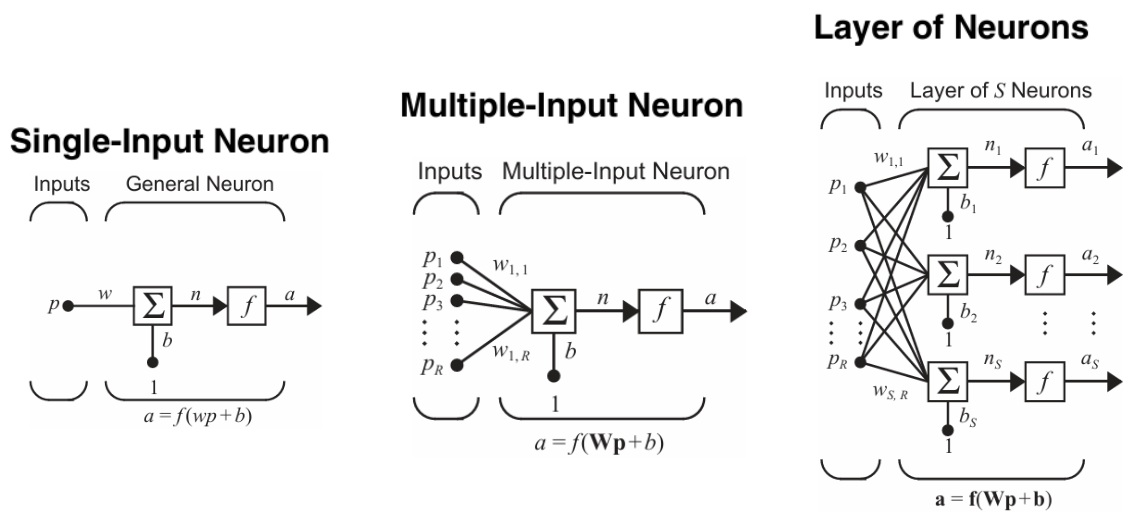

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Paquetes y Librerías 📚

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pandas as pd

# Funciones de activación o de transferencia 📈

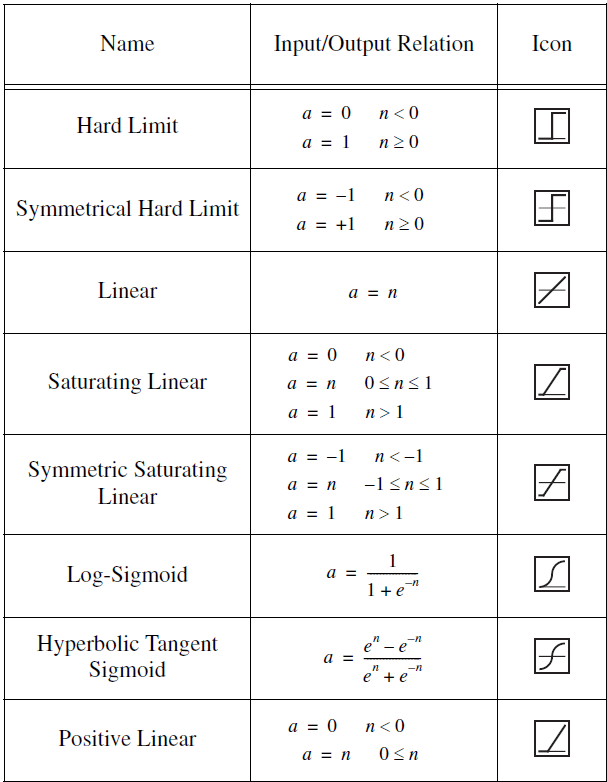

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

In [2]:
def step(n):
    return np.where(n >= 0, 1, 0)

def stepSym(n):
    return np.where(n < 0, -1, 1)

def linear(n):
    return np.array(n)

def linearSat(n):
    return np.clip(n, 0, 1)

def linearSatSym(n):
    return np.clip(n, -1, 1)

def sigmoid(n):
    return 1 / (1 + np.exp(-n))

def tanh(n):
    return np.tanh(n)

def relu(n):
    return np.maximum(0, n)

def leakyRelu(n):
    return np.where(n < 0, 0.01 * n, n)

def elu(n):
    return np.where(n < 0, 0.01 * (np.exp(n) - 1), n)

def softmax(n):
    return np.exp(n) / np.sum(np.exp(n))

def softPlus(n):
    return np.log(1 + np.exp(n))

def logSigmoid(n):
    return np.log(1 / (1 + np.exp(-n)))

def hyperbTanhSigmoid(n):
    return np.tanh(logSigmoid(n))


### Probar salidas

In [3]:
n = np.array([[0.5, -1.2, 3.0],
              [-0.7, 0.0, 2.1]])

for func in [step, stepSym, linear, linearSat, linearSatSym, sigmoid, tanh, relu, leakyRelu, elu, softPlus, logSigmoid, hyperbTanhSigmoid, softmax]:
    print(f"{func.__name__}:\n{func(n)}\n")


step:
[[1 0 1]
 [0 1 1]]

stepSym:
[[ 1 -1  1]
 [-1  1  1]]

linear:
[[ 0.5 -1.2  3. ]
 [-0.7  0.   2.1]]

linearSat:
[[0.5 0.  1. ]
 [0.  0.  1. ]]

linearSatSym:
[[ 0.5 -1.   1. ]
 [-0.7  0.   1. ]]

sigmoid:
[[0.62245933 0.23147522 0.95257413]
 [0.33181223 0.5        0.89090318]]

tanh:
[[ 0.46211716 -0.83365461  0.99505475]
 [-0.60436778  0.          0.97045194]]

relu:
[[0.5 0.  3. ]
 [0.  0.  2.1]]

leakyRelu:
[[ 0.5   -0.012  3.   ]
 [-0.007  0.     2.1  ]]

elu:
[[ 0.5        -0.00698806  3.        ]
 [-0.00503415  0.          2.1       ]]

softPlus:
[[0.97407698 0.26328247 3.04858735]
 [0.40318605 0.69314718 2.21551952]]

logSigmoid:
[[-0.47407698 -1.46328247 -0.04858735]
 [-1.10318605 -0.69314718 -0.11551952]]

hyperbTanhSigmoid:
[[-0.44148755 -0.89828824 -0.04854915]
 [-0.80164054 -0.6        -0.11500839]]

softmax:
[[0.05201308 0.00950193 0.63364898]
 [0.01566604 0.03154753 0.25762245]]



### Visualizar las funciones

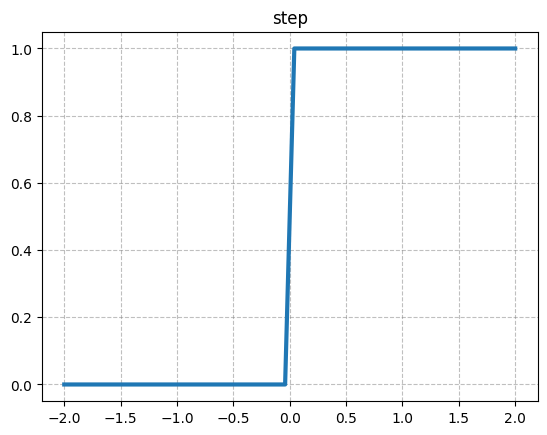

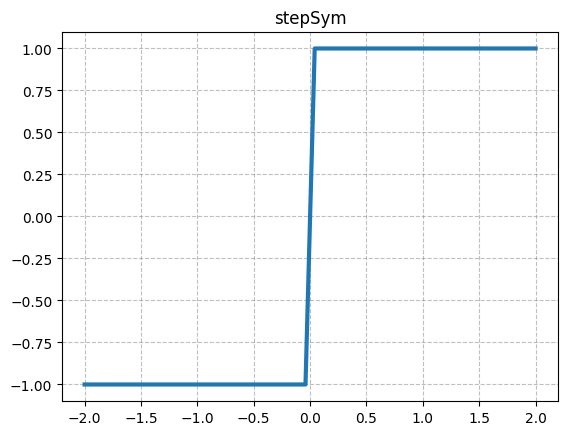

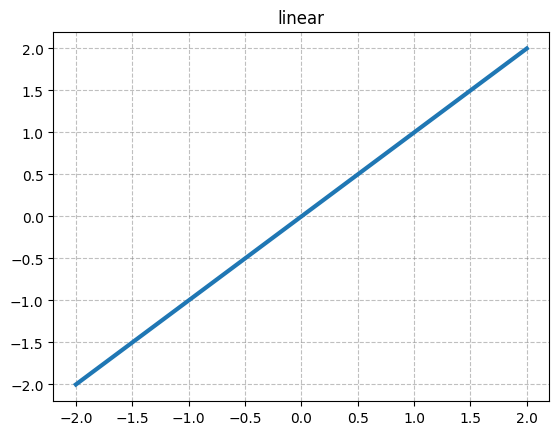

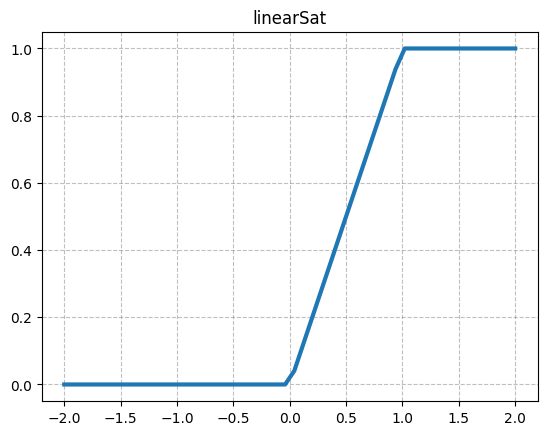

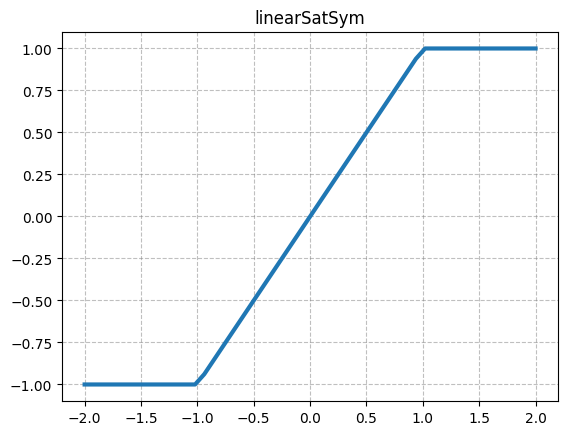

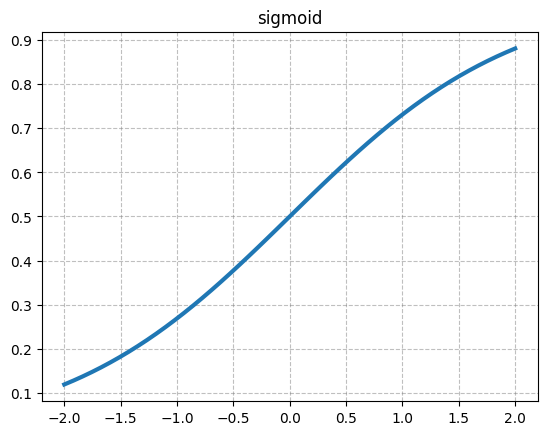

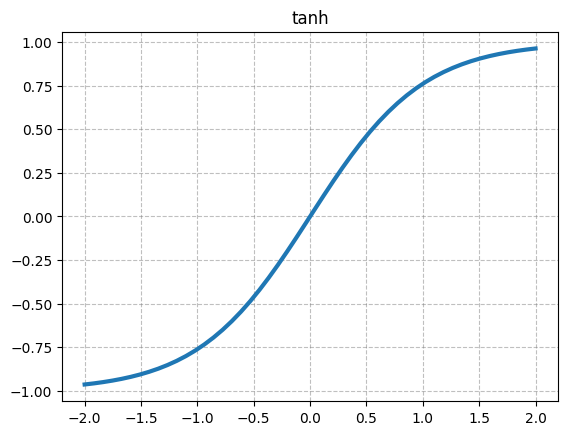

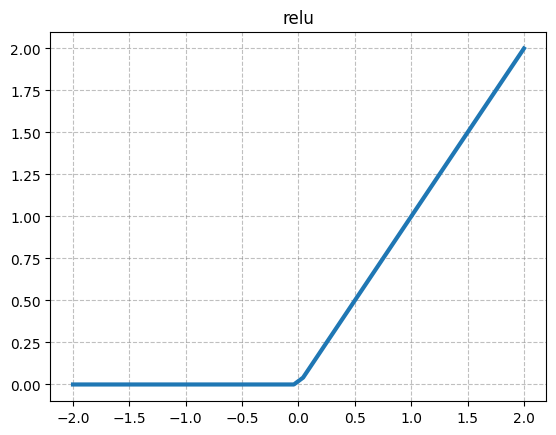

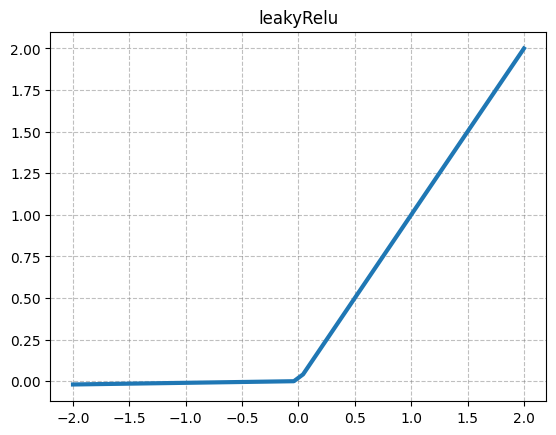

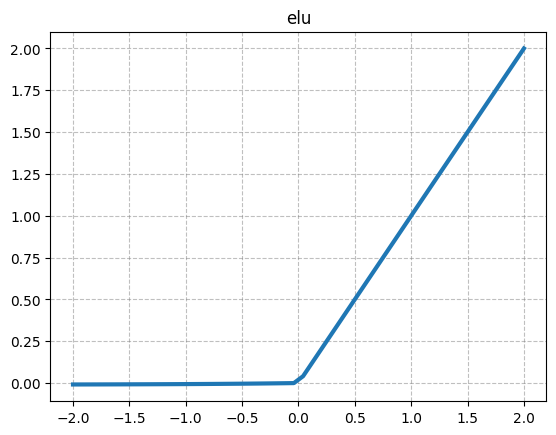

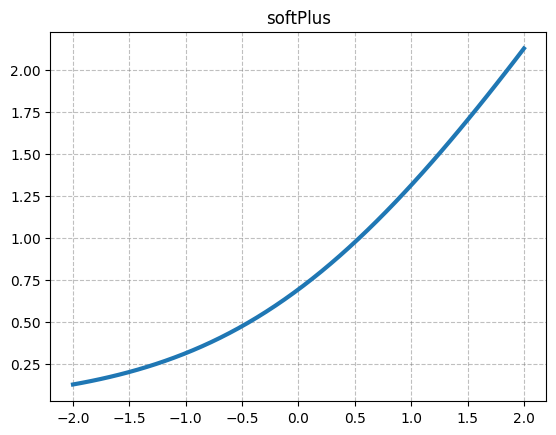

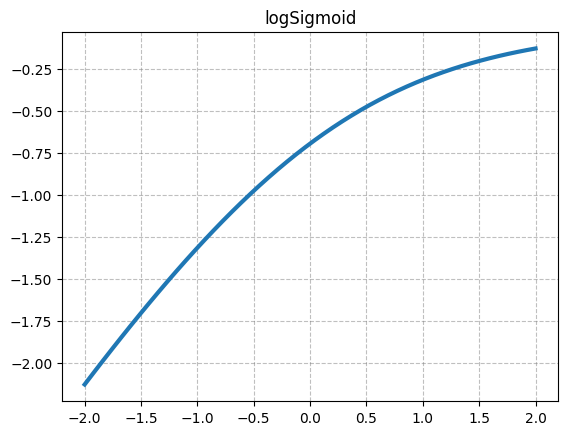

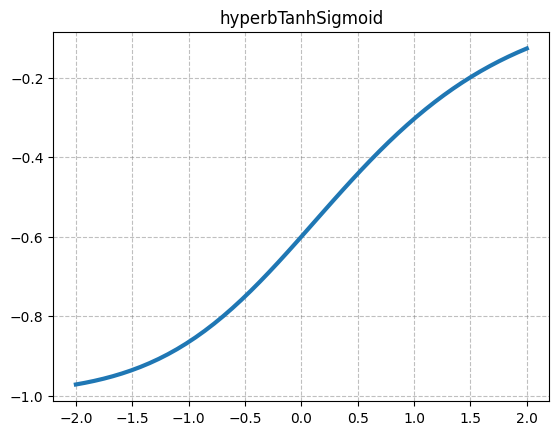

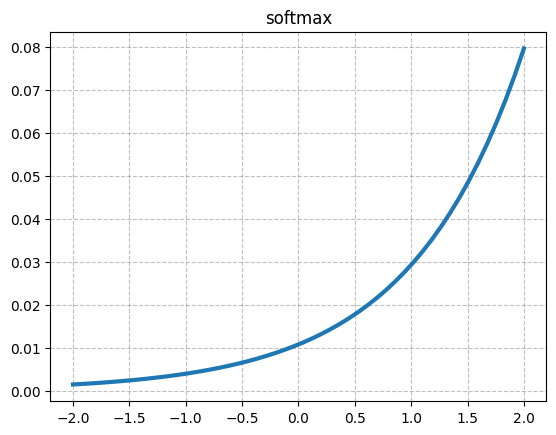

In [4]:
funciones_activacion = {
    'step': step,
    'stepSym': stepSym,
    'linear': linear,
    'linearSat': linearSat,
    'linearSatSym': linearSatSym,
    'sigmoid': sigmoid,
    'tanh': tanh,
    'relu': relu,
    'leakyRelu': leakyRelu,
    'elu': elu,
    'softPlus': softPlus,
    'logSigmoid': logSigmoid,
    'hyperbTanhSigmoid': hyperbTanhSigmoid,
    'softmax': softmax
}

x = np.linspace(-2,2)

for k,v in funciones_activacion.items():
    plt.plot(x, v(x), lw=3)
    plt.title(k)
    plt.grid(ls='--', c='gray', alpha=0.5)
    plt.show()

---
# **Perceptrón Simple**
## 1 entrada, 1 salida
---

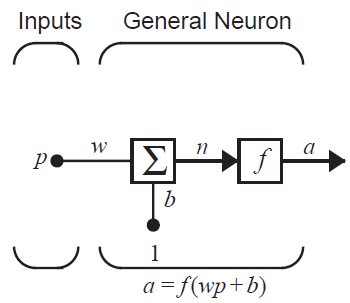


*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Generar el dataset

In [5]:
# Número de registros
samples = 20

np.random.seed(1)  # semilla para reproducibilidad

# Generar promedios aleatorios
promedios = np.random.uniform(5, 10, samples)   # promedios de 5 a 10

# Etiquetas
aceptado = (promedios > 7.5).astype(int)   # regla: si promedio > 7.5 → aceptado=1

# Dataset: Usamos promedio -> aceptado
p = promedios.reshape(-1,1) # tamaño de entrada (n,1)
a = aceptado # tamaño de salida (n,)

dataset_df = pd.DataFrame({'Candidatos': np.arange(1, samples+1), 'Promedio Bachillerato': np.round(promedios, 2), 'Dictamen de ingreso': aceptado})
dataset_df.set_index('Candidatos', inplace=True)
dataset_df

,Promedio Bachillerato,Dictamen de ingreso
Candidatos,,
1,7.09,0
2,8.60,1
3,5.00,0
4,6.51,0
5,5.73,0
6,5.46,0
7,5.93,0
8,6.73,0
9,6.98,0


# Visualizar el Dataset

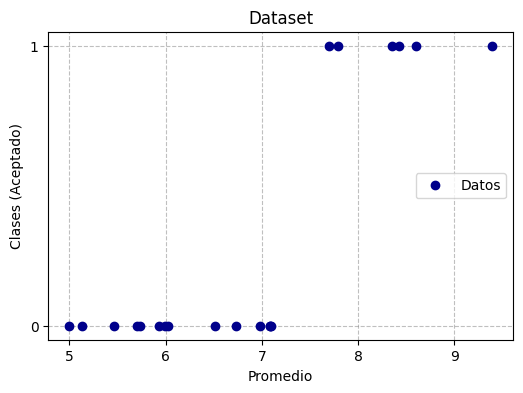

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(promedios, aceptado, 'o', color='darkblue', label='Datos')
plt.title('Dataset')
plt.xlabel('Promedio')
plt.ylabel('Clases (Aceptado)')
plt.legend(loc = 'center right')
plt.grid(ls='--', color='grey', alpha=0.5)
plt.yticks([0, 1])
plt.show()

# Inicialización de parámetros

In [7]:
# Inicializar aleatoriamente los pesos y bias (sesgos)
np.random.seed(10) # Pueden cambiarlo a su consideración
w = np.random.rand()  # peso escalar porque es una sola entrada
b = np.random.rand()
epochs = 10

print("Peso inicial:", w)
print("Bias inicial:", b)

Peso inicial: 0.771320643266746
Bias inicial: 0.0207519493594015


### Función Sumatoria

In [8]:
def SumMult(p, w, b):
    """
    Calcula n = p*w + b
    p : vector de entradas (n,1)
    w : peso escalar
    b : bias escalar
    """
    n = p * w + b
    return n

# Entrenamiento

In [9]:
for epoch in range(epochs):
    for i in range(len(p)):
        pi = p[i]
        ai = a[i]

        # Paso hacia adelante
        n = SumMult(pi, w, b)
        a_hat = step(n) # salida predicha

        # Cálculo del error
        error = ai - a_hat

        # Actualización de pesos
        w += error * pi
        b += error


# Ver al Perceptrón 🔎

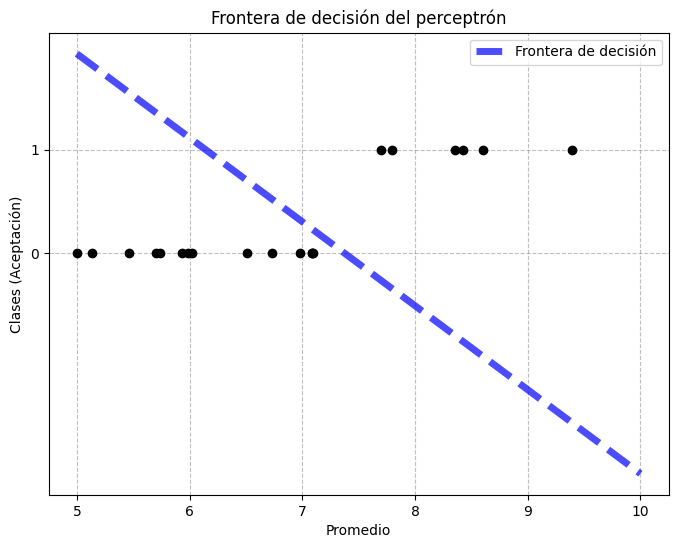

In [10]:
# Rango de valores para el eje x (promedios)
x_vals = np.linspace(5, 10)

# Cálculo de la frontera de decisión
y_vals = -(w * x_vals + b)

# Graficación
plt.figure(figsize=(8, 6))
plt.plot(promedios, aceptado, 'o', color='black')
plt.plot(x_vals, y_vals, 'b--', label="Frontera de decisión", lw=5, alpha=0.7)
plt.xlabel("Promedio")
plt.ylabel("Clases (Aceptación)")
plt.grid(ls='--', color='grey', alpha=0.5)
plt.legend()
plt.yticks([0, 1])
plt.title("Frontera de decisión del perceptrón")
plt.show()


# **¿Qué hicimos?** 🤔

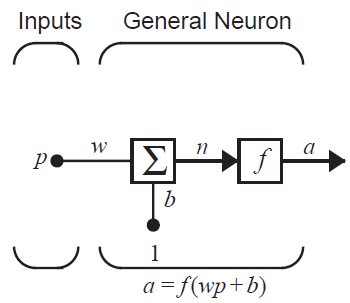


*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# **Ejercicio 1**: Probar nuevo registro

Utilizar el perceptrón programado con nuevos promedios del bachillerato y para hacer una **predicción** y visualizar su dictamen de ingreso.

Se proponen dos ejemplos y se muestra la salida esperada para la variable '**prediccion**'.

In [ ]:
# Probar con un nuevo estudiante
nuevos_promedios = [8.5, 3.6] # Pueden agregar más ejemplos

for promedio in nuevos_promedios:

    # COMPLETAR

    print(f"Promedio: {promedio:.2f} → {'Aceptado' if prediccion[0]==1 else 'No aceptado'}")

Promedio: 8.50 → Aceptado
Promedio: 3.60 → No aceptado


---
# **Perceptrón simple con múltiples entradas**

## R entradas, 1 salida
---

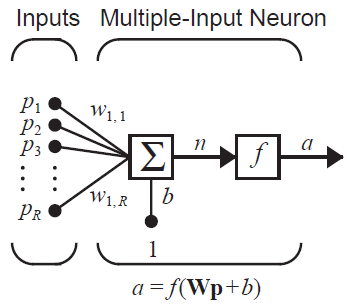

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Generar el dataset

In [11]:
# Número de registros
samples = 20

np.random.seed(10)  # semilla para reproducibilidad

# Generar promedios aleatorios
promedios = np.random.uniform(5, 10, samples)   # promedios de 5 a 10
calif_examen  = np.random.uniform(5, 10, samples)     # resultados de examen de 50 a 100

# Etiquetas
aceptado = ((promedios > 7.5) & (calif_examen > 7)).astype(int)   # regla: si promedio > 7.5 y examen > 70 → aceptado=1

# Dataset de múltiples entradas
p = np.column_stack((promedios, calif_examen))  # (n,2)
a = aceptado # (n,)

dataset_df = pd.DataFrame({'Candidato': range(1, samples+1), 'Promedio Bachillerato': np.round(promedios, 2), 'Examen conocimientos': np.round(calif_examen, 2), 'Dictamen de ingreso': aceptado})
dataset_df.set_index('Candidato', inplace=True)
dataset_df

,Promedio Bachillerato,Examen conocimientos,Dictamen de ingreso
Candidato,,,
1,8.86,7.71,1
2,5.10,5.71,0
3,8.17,6.87,0
4,8.74,8.37,1
5,7.49,7.21,0
6,6.12,7.17,0
7,5.99,8.09,0
8,8.80,7.57,1
9,5.85,8.25,0


# Visualizar el Dataset

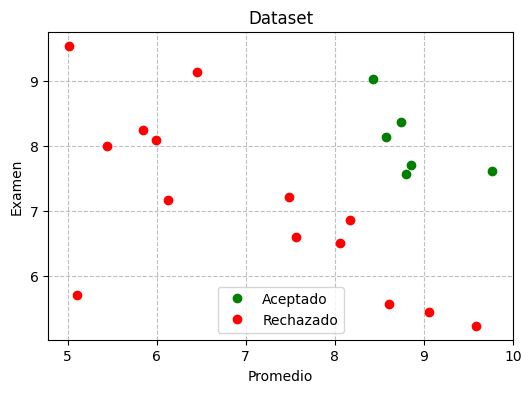

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(promedios[aceptado == 1], calif_examen[aceptado == 1], 'o', color='green', label='Aceptado')
plt.plot(promedios[aceptado == 0], calif_examen[aceptado == 0], 'o', color='red', label='Rechazado')
plt.title('Dataset')
plt.xlabel('Promedio')
plt.ylabel('Examen')
plt.grid(ls='--', color='grey', alpha=0.5)
plt.legend(loc='lower center')
plt.show()

# Inicialización de paramétros

In [15]:
# Generar MATRIZ de pesos y sesgo
np.random.seed(10)
W = np.random.rand(2)   # vector de 2 pesos (R)
b = np.random.rand()    # sesgo escalar
epochs = 1000
lr = 0.5

print("Pesos iniciales:", W)
print("Bias inicial:", b)

Pesos iniciales: [0.77132064 0.02075195]
Bias inicial: 0.6336482349262754


### Notar que los pesos ahora son un vector (1, 2) ❗

### Función sumatoria

In [16]:
def SumMult(p, W, b):
    """
    Calcula n = p*W + b
    p : vector de entradas (n, d)  -> cada fila es un ejemplo
    W : vector de pesos (d,)
    b : bias escalar
    """
    return np.dot(p, W) + b # PRODUCTO PUNTO

# Entrenamiento

In [17]:
for epoch in range(epochs):
    for i in range(len(p)):
        pi = p[i]
        ai = a[i]

        # Paso hacia adelante
        n = SumMult(pi, W, b)
        a_hat = step(n) # salida predicha

        # Cálculo del error
        error = ai - a_hat

        # Actualización de pesos
        W += lr * error * pi
        b += lr * error


# Ver al Perceptrón 🔎

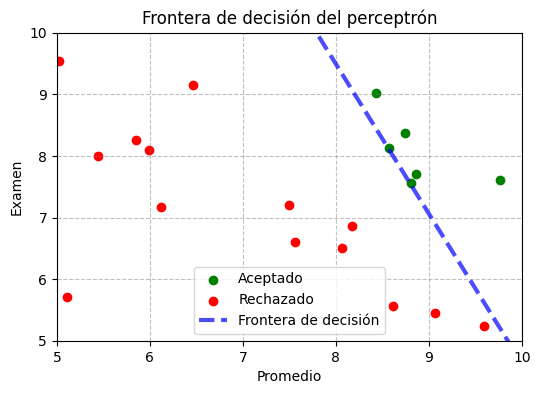

In [18]:
# Rango de valores para el eje x
x_vals = np.linspace(5, 10)

# Cálculo de la frontera de decisión
w1, w2 = W
y_vals = -(w1 * x_vals + b) / w2

# Graficación
plt.figure(figsize=(6, 4))
plt.scatter(promedios[a == 1], calif_examen[a == 1], color='green', label='Aceptado')
plt.scatter(promedios[a == 0], calif_examen[a == 0], color='red', label='Rechazado')
plt.plot(x_vals, y_vals, 'b--', label="Frontera de decisión", lw=3, alpha=0.7)
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.grid(ls='--', color='grey', alpha=0.5)
plt.legend()
plt.ylim(5, 10)
plt.xlim(5, 10)
plt.title("Frontera de decisión del perceptrón")
plt.show()


## ¿Qué tan bueno es este Perceptrón? 🤔
## ¿Cómo mejorarlo para que separe mejor las clases?

---
# **Ejercicio 2**: Agregar una nueva característica o variable de entrada
---
>### a. Crear un arreglo de valores para las actividades extracurriculares llamado: '**extracurricular**' (*nueva variable de entrada*).
>### b. Los valores deben ser enteros en el rango: 0 - 10.
>### c. El criterio de las etiquetas es el siguiente:
>```
># aceptado = ((promedios > 7.5) & (examenes > 7) & (extracurricular >= 5)).astype(int)
>```
>### d. Inicializa los parámetros (pesos, sesgos, etc.).
>### e. Entrena el Perceptrón.
>### f. Visualiza la frontera de decisión.
---





In [ ]:
# Codifica tu ejercicio aquí

---
# **Perceptrón simple con múltiples entradas y múltiples salidas**

## R entradas, S salidas
---

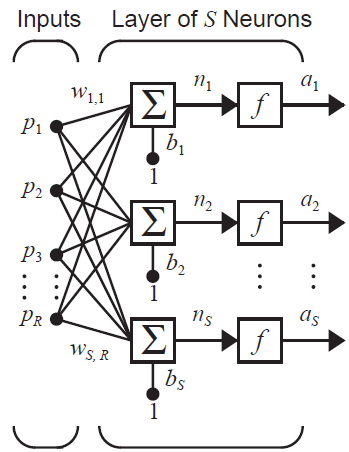

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Generar el dataset

In [19]:
# Número de registros
samples = 1000

np.random.seed(10)  # semilla para reproducibilidad

# Generar promedios aleatorios
promedios = np.random.uniform(5, 10, samples)   # promedios de 5 a 10
calif_examen  = np.random.uniform(5, 10, samples)     # resultados de examen de 50 a 100

# Etiquetas
aceptado = ((promedios > 7.5) & (calif_examen > 7)).astype(int)   # regla: si promedio > 7.5 y examen > 70 → aceptado=1
beca = ((promedios > 8) & (calif_examen > 8)).astype(int)       # regla: si promedio > 8.5 y examen > 80 → beca=1

# Dataset de múltiples entradas y múltiples salidas
p = np.column_stack((promedios, calif_examen))  #  (n, 2)
a = np.column_stack((aceptado, beca))   #  (n, 2)

dataset_df = pd.DataFrame({'Candidato': range(1, samples + 1), 'Promedio Bachillerato': np.round(promedios, 2), 'Examen conocimientos': np.round(calif_examen, 2), 'Dictamen de ingreso': aceptado, 'Beca': beca})
dataset_df.set_index('Candidato', inplace=True)
dataset_df

,Promedio Bachillerato,Examen conocimientos,Dictamen de ingreso,Beca
Candidato,,,,
1,8.86,6.74,0,0
2,5.10,9.04,0,0
3,8.17,7.30,1,0
4,8.74,8.13,1,1
5,7.49,6.02,0,0
...,...,...,...,...
996,7.58,9.58,1,0
997,6.05,7.48,0,0
998,5.83,7.28,0,0


# Visualizar el Dataset

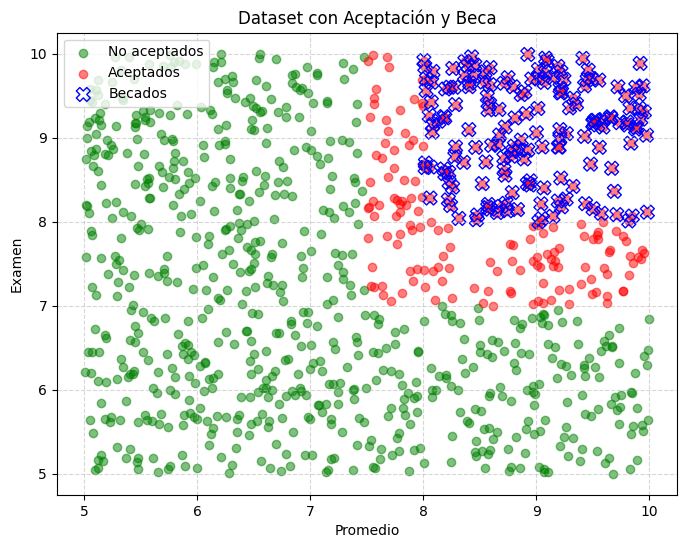

In [20]:
# Visualización
plt.figure(figsize=(8, 6))
colors = ['r', 'g']

# Aceptados
plt.scatter(promedios[aceptado == 0], calif_examen[aceptado == 0], c=colors[1], label='No aceptados', alpha=0.5)
plt.scatter(promedios[aceptado == 1], calif_examen[aceptado == 1], c=colors[0], label='Aceptados', alpha=0.5)

# Becados
beca_indices = np.where(beca == 1)[0]
plt.scatter(promedios[beca_indices], calif_examen[beca_indices], facecolors='none', edgecolors='b', marker='X', s=100, label='Becados')

plt.legend()

plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.title("Dataset con Aceptación y Beca")
plt.grid(ls='--', alpha=0.5)
plt.show()

# Inicialización de parámetros

In [21]:
# Matriz de Pesos y VECTOR de Sesgos
np.random.seed(1)
W = np.random.rand(2, 2)  # (2 entradas, 2 salidas)
b = np.random.rand(1, 2)  # (1, 2)
epochs = 500
lr = 0.01

print("Pesos iniciales:", W)
print("Bias inicial:", b)

Pesos iniciales: [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]]
Bias inicial: [[0.14675589 0.09233859]]


### Notar que los pesos ahora son una matriz (2, 2) y los sesgos (o biases) son un vector (1, 2) ❗

### Función sumatoria

In [22]:
def SumMult(p, W, b):
    """
    Calcula n = p*W + b
    p : vector de entradas (n, d)  -> cada fila es un ejemplo
    W : vector de pesos (d,)
    b : bias escalar
    """
    return np.dot(p, W) + b # Producto punto

# Entrenamiento

In [23]:
for epoch in range(epochs):
    for i in range(len(p)):
        pi = p[i].reshape(1, 2) # (1, 2)
        ai = a[i].reshape(1, 2) # (1, 2)

        # Paso hacia adelante
        n = SumMult(pi, W, b) # (1, 2)
        a_hat = step(n) # salida predicha (1, 2)

        # Cálculo del error
        error = ai - a_hat # (1, 2)

        # Actualización de pesos
        W += lr * np.dot(pi.T, error) # (2, 2)
        b += lr * error # (1, 2)

# Ver el Perceptrón 🔎

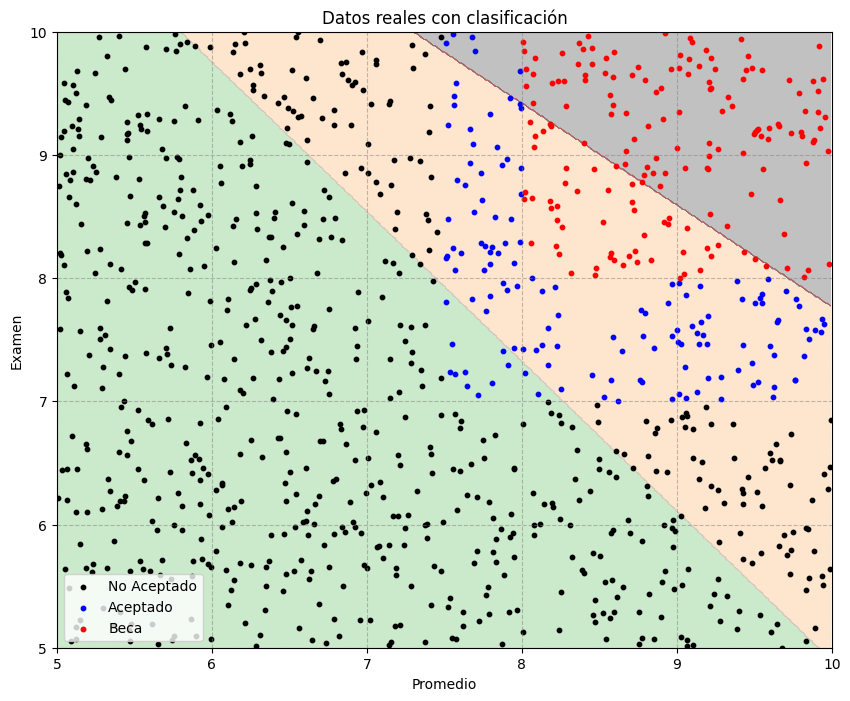

In [24]:
# Visualización de fronteras
x_min, x_max = 5, 10
y_min, y_max = 5, 10
h = 0.01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Paso por el perceptrón entrenado
n_grid = SumMult(grid, W, b)
a_grid = step(n_grid)   # valores en (0,1)

# Umbralizar
aceptado_map = a_grid[:, 0] > 0.5
beca_map = a_grid[:, 1] > 0.5

# Codificación de colores
colors = np.zeros_like(aceptado_map, dtype=int)
colors += aceptado_map.astype(int)
colors += 2 * beca_map.astype(int)

# Desplegando figura
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, colors.reshape(xx.shape), alpha=0.4, cmap='Accent')

# Filtrar por clase
mask_none   = (aceptado == 0) & (beca == 0)
mask_acept  = (aceptado == 1) & (beca == 0)
mask_beca   = (aceptado == 1) & (beca == 1)

# Graficar cada clase con scatter
plt.scatter(promedios[mask_none], calif_examen[mask_none], c="k", s=10, label="No Aceptado")
plt.scatter(promedios[mask_acept], calif_examen[mask_acept], c="b", s=10, label="Aceptado")
plt.scatter(promedios[mask_beca], calif_examen[mask_beca], c="r", s=10, label="Beca")

plt.legend(loc = 'lower left')
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.title("Datos reales con clasificación")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(ls='--', color='grey', alpha=0.5)
plt.show()


# **Ejercicio 3**: Similarmente al ejercicio 1, prueba un nuevo registro

>#### a. Crear un nuevo registro (valor para promedio de bachillerato y calificación del examen de ingreso).
>#### b. Emplear el Perceptrón entrenado para hacer una predicción de la aceptación y obtención de beca.

# **Ejercicio 4**: Similarmente al ejercicio 2, integra las actividades extracurriculares para mejorar las predicciones

>#### a. Recuerda que debes asignar un nuevo criterio para la generación de las etiquetas.
>#### b. Reentrenar el perceptrón.
>#### c. Visualiza sus fronteras de decisión.
>#### d. ¿Mejorarán las predicciones?


In [ ]:
# Codifica aquí